In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
raw_df = pd.read_csv(r'C:\Users\karthikeya\telecom_call_quality_anlaysis_and_prediction\data\call-quality-clean.csv')

# We can use raw data where the data points are not dropped to calculate the operater wise, month & year wise ratings

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58609 entries, 0 to 58608
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inout_travelling   58609 non-null  object 
 1   operator           58609 non-null  object 
 2   network_type       58609 non-null  object 
 3   rating             58609 non-null  int64  
 4   calldrop_category  58609 non-null  object 
 5   latitude           58609 non-null  float64
 6   longitude          58609 non-null  float64
 7   state_name         58609 non-null  object 
 8   month              58609 non-null  int64  
 9   year               58609 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.5+ MB


In [5]:
raw_df_1 = pd.read_csv(r'C:\Users\karthikeya\telecom_call_quality_anlaysis_and_prediction\data\call-quality.csv')

## Let us look at the customer ratings by operator wise

In [6]:
raw_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   inout_travelling   104334 non-null  object 
 1   operator           104334 non-null  object 
 2   network_type       104316 non-null  object 
 3   rating             104334 non-null  int64  
 4   calldrop_category  104334 non-null  object 
 5   latitude           104334 non-null  float64
 6   longitude          104334 non-null  float64
 7   state_name         58609 non-null   object 
 8   month              104334 non-null  int64  
 9   year               104334 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.0+ MB


In [7]:
raw_df_1.dtypes

inout_travelling      object
operator              object
network_type          object
rating                 int64
calldrop_category     object
latitude             float64
longitude            float64
state_name            object
month                  int64
year                   int64
dtype: object

In [8]:
categorical_columns = raw_df_1.select_dtypes(include="object").columns
numerical_columns = raw_df_1.select_dtypes(exclude="object").columns

### let us look at unique values in each categorical column

In [9]:
for column in categorical_columns:
    print(f"{column}:",raw_df_1[column].unique(),"\n")

inout_travelling: ['Indoor' 'Travelling' 'Outdoor'] 

operator: ['RJio' 'VI' 'Airtel' 'BSNL' 'MTNL' 'Idea' 'Vodafone' '\ufeffRJio'
 '\ufeffIdea'] 

network_type: ['4G' '3G' 'Unknown' '2G' nan] 

calldrop_category: ['Poor Voice Quality' 'Satisfactory' 'Call Dropped'] 

state_name: ['Uttar Pradesh' nan 'Maharashtra' 'Bihar' 'Karnataka' 'Tamil Nadu'
 'Telangana' 'Uttarakhand' 'Delhi' 'Odisha' 'Gujarat' 'Madhya Pradesh'
 'Assam' 'Meghalaya' 'Haryana' 'Chhattisgarh' 'Rajasthan' 'Jharkhand'
 'West Bengal' 'Andhra Pradesh' 'Kerala' 'Kashmir' 'Punjab' 'NA '
 'Himachal Pradesh' 'Goa' 'Nagaland' 'Jammu and Kashmir' 'Manipur'
 'Unnamed: 7' 'Puducherry' 'Laccadives' 'Tripura' 'Arunachal Pradesh'
 'Chandigarh' 'NCT' 'Mizoram'] 



- Replacing non-sensical values and errors 

In [10]:
raw_df_1.replace({'\ufeffRJio': "RJio",
 "\ufeffIdea" : "Idea", 'Unnamed: 7': "NA " }, inplace=True)

In [11]:
raw_df_1.isnull().sum()

inout_travelling         0
operator                 0
network_type            18
rating                   0
calldrop_category        0
latitude                 0
longitude                0
state_name           45725
month                    0
year                     0
dtype: int64

- we have null values in network type, state name columns

 _average rating across the operators_

In [12]:
# plt.figure(figsize=(12,8))
df = raw_df_1.groupby(['operator'])['rating'].mean().reset_index()
fig = px.bar(data_frame=df,
       x='operator',
       y='rating',
       color="operator",
       title = "Average customer ratings for call quality for different\n operators from 2021 till 2024")
# plt.xticks(rotation=10);
fig.show()

In [13]:
# plt.figure(figsize=(12,8))
df = raw_df_1.groupby(['state_name'])['rating'].mean().reset_index()
fig = px.bar(data_frame=df,
       x='state_name',
       y='rating',
       color="state_name",
       title = "Average customer ratings for call quality for different states from 2021 till 2024")
# plt.xticks(rotation=10);
fig.show()

In [15]:
states_with_1000= ["maharashtra", "Karnataka", "Madhya Pradesh", "Uttar Pradesh",
                   "West Bengal", "Delhi", "Kerala", "Uttarakhand", "Himachal Pradesh",
                   "Chhattisgarh", "Gujarat", "Rajasthan", "Telangana", "Andhra Pradesh",
                   "Tamil Nadu"]

In [16]:
df = raw_df_1.groupby(['state_name'])['rating'].mean().reset_index()
df = df[df['state_name'].isin(states_with_1000)]
fig = px.bar(data_frame=df,
       x='state_name',
       y='rating',
       color="state_name",
       title = "Average customer ratings for call quality for different states from 2021 till 2024")
# plt.xticks(rotation=10);
fig.write_image("Average customer ratings for call quality for different states from 2021 till 2024.png")

In [17]:
raw_df_1 = raw_df_1.drop(raw_df_1[raw_df_1['state_name']=="NA "].index)
raw_df_1.reset_index(drop=True)

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
1,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
3,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
4,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022
...,...,...,...,...,...,...,...,...,...,...
99955,Indoor,RJio,4G,5,Satisfactory,12.958151,77.484752,Karnataka,11,2023
99956,Indoor,Airtel,2G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,11,2023
99957,Indoor,Airtel,4G,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023
99958,Indoor,Airtel,Unknown,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023


In [18]:
raw_df_1.groupby(['state_name'])['state_name'].count().sort_values(ascending=False)>1000

state_name
Maharashtra           True
Karnataka             True
Madhya Pradesh        True
Uttar Pradesh         True
West Bengal           True
Delhi                 True
Kerala                True
Uttarakhand           True
Himachal Pradesh      True
Chhattisgarh          True
Gujarat               True
Rajasthan             True
Telangana             True
Andhra Pradesh        True
Tamil Nadu            True
Nagaland             False
Jharkhand            False
Bihar                False
Haryana              False
Punjab               False
Assam                False
Odisha               False
Goa                  False
Jammu and Kashmir    False
Manipur              False
Meghalaya            False
Kashmir              False
Tripura              False
Puducherry           False
Laccadives           False
Arunachal Pradesh    False
Chandigarh           False
NCT                  False
Mizoram              False
Name: state_name, dtype: bool

_average rating across the years for each operator_

In [19]:
# Loop through each unique operator
for operator in raw_df_1['operator'].unique():
    # Filter the DataFrame for the current operator
    filtered_df = raw_df_1[raw_df_1['operator'] == operator]
    
    # Group by year and inout_travelling, and calculate the mean rating
    grouped_df = filtered_df.groupby(['year'])['rating'].mean().reset_index()
    
    
    # Plot the data using plotly express
    fig = px.bar(data_frame=grouped_df,
                 x='year', y='rating',
                 color='year',
                 title=f'Average Rating by Year for {operator}',
                 labels={'rating': 'Average Rating', 'year': 'Year', })
    
    # Update layout to match your desired styling

    
    # Show the plot
    fig.show()

##### _average rating across based on customer is indoors, outdoors or travelling for each operator_

In [20]:
# Loop through each unique operator
for operator in raw_df_1['operator'].unique():
    # Filter the DataFrame for the current operator
    filtered_df = raw_df_1[raw_df_1['operator'] == operator]
    
    # Group by year and inout_travelling, and calculate the mean rating
    grouped_df = filtered_df.groupby(['year', 'inout_travelling'])['rating'].mean().reset_index()
    
    # Plot the data using plotly express
    fig = px.bar(data_frame=grouped_df, x='year', y='rating', color='inout_travelling', 
                 title=f'Average Rating by Year and In/Out/Travelling for : {operator}',
                 labels={'rating': 'Average Rating', 'year': 'Year', 'inout_travelling': 'In/Out/Travelling'})
    
    # Update layout to match your desired styling
    fig.update_layout(barmode='group', xaxis_tickangle=-45, legend_title_text='In/Out/Travelling')
    
    # Show the plot
    fig.show()

In [21]:
raw_df_1['year'].sort_values()

76613    2021
76612    2021
76611    2021
76610    2021
76609    2021
         ... 
19713    2024
19714    2024
19715    2024
19716    2024
19717    2024
Name: year, Length: 99960, dtype: int64

In [22]:
raw_df_1[raw_df_1['operator']=="RJio"]['rating'].describe()

count    36899.000000
mean         3.062739
std          1.632421
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [25]:
px.pie(data_frame=raw_df_1[raw_df_1['operator']=="RJio"], values='rating',names='year')


In [ ]:
for year in raw_df_1['year'].sort_values(ascending=True).unique():
    # Filter the DataFrame for the current operator
    filtered_df = raw_df_1[(raw_df_1['operator'] == "RJio") & (raw_df_1['year'] == year)]
    
    # Group by year and inout_travelling, and calculate the mean rating
    grouped_df = filtered_df.groupby(['month'])['rating'].mean().reset_index()
    
    # Plot the data using plotly express
    fig = px.bar(data_frame=grouped_df, x='month', y='rating', color='month' ,
                title=f'Average Customer Rating for RJio for year {year}',
                labels={'rating': 'Average Rating', 'month': 'month'})
    
    # Update layout to match your desired styling
    fig.update_layout(barmode='group', xaxis_tickangle=-45, legend_title_text='month')
    
    # Show the plot
    fig.show()

In [ ]:
# Loop through each unique operator
for year in raw_df_1['year'].sort_values().unique():
    for operator in raw_df_1['operator'].unique():
        # Filter the DataFrame for the current operator
        filtered_df = raw_df_1[(raw_df_1['operator'] == operator) & (raw_df_1['year'] == year)]
        
        # Group by year and inout_travelling, and calculate the mean rating
        grouped_df = filtered_df.groupby(['month'])['rating'].mean().reset_index()
        
        # Plot the data using plotly express
        fig = px.bar(data_frame=grouped_df, x='month', y='rating', color='month' ,
                    title=f'Average Rating by {year} and month for : {operator}',
                    labels={'rating': 'Average Rating', 'month': 'month'})
        
        # Update layout to match your desired styling
        fig.update_layout(barmode='group', xaxis_tickangle=-45, legend_title_text='month')
        
        # Show the plot
        fig.show()

In [26]:
# Loop through each unique operator
for operator in raw_df_1['operator'].unique():
    # Filter the DataFrame for the current operator
    filtered_df = raw_df_1[raw_df_1['operator'] == operator]
    
    # Group by year and inout_travelling, and calculate the mean rating
    grouped_df = filtered_df.groupby(['inout_travelling'])['rating'].mean().reset_index()
    
    # Plot the data using plotly express
    fig = px.bar(data_frame=grouped_df, y='rating', x='inout_travelling', color="inout_travelling",
                 title=f'Average Rating by In/Out/Travelling for : {operator}',
                 labels={'rating': 'Average Rating', 'year': 'Year', 'inout_travelling': 'In/Out/Travelling'})
    
    # Update layout to match your desired styling
    # fig.update_layout(barmode='group', xaxis_tickangle=-45, legend_title_text='In/Out/Travelling')
    
    # Show the plot
    fig.show()

_Average customer rating per calldrop_category across different operators_

In [ ]:
for operator in raw_df_1['operator'].unique():
   
    # Filter the DataFrame for the current operator
    filtered_df = raw_df_1[raw_df_1['operator'] == operator]
    
    # Group by calldrop category and calculate the mean rating
    grouped_df = filtered_df.groupby(['calldrop_category'])['rating'].mean().reset_index()
    
    # Plot the data
    fig= px.bar(data_frame=grouped_df,
           x='calldrop_category',
           y='rating',
           color="calldrop_category",
           title = f'Average Rating per calldrop category for {operator}'
           )
    fig.show()
    

In [27]:
call_drop_operator = raw_df_1.groupby(['operator','calldrop_category'])[['operator']].count()
call_drop_df = pd.DataFrame((call_drop_operator.xs('Call Dropped', level='calldrop_category')['operator']/raw_df_1.groupby(['operator'])['calldrop_category'].count())*100, columns=['call drop %'])
call_drop_operator_year = raw_df_1.groupby(['year','operator','calldrop_category'])[['operator']].count()
call_drop_df_yearly = pd.DataFrame((call_drop_operator_year.xs('Call Dropped', level='calldrop_category')['operator']/raw_df_1.groupby(['operator'])['calldrop_category'].count())*100, columns=["call drop %"])

- Call drop for each operator in each year

<Axes: ylabel='year,month'>

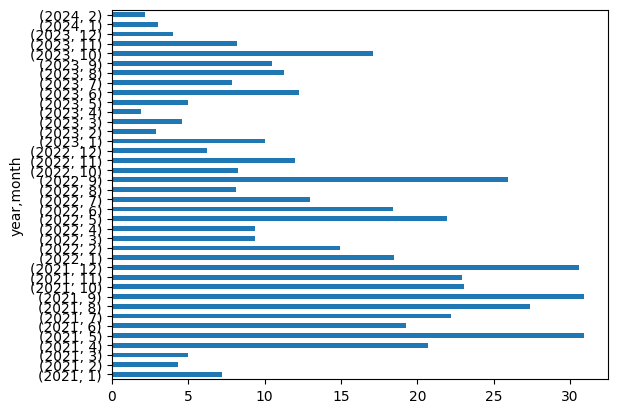

In [28]:
# Group by year, month and calldrop category and calculate counts
df = raw_df_1[raw_df_1['operator']=="RJio"].groupby(['year','month'])[['calldrop_category']].value_counts()

# Calculate percentages within each group
df = df.unstack()  # Unstack for calculating percentages

df = df.div(df.sum(axis=1), axis=0) * 100  # Calculate percentages
df['Call Dropped'].plot(kind="barh")

In [29]:
raw_df_1[(raw_df_1['operator']=="RJio") & (raw_df_1['calldrop_category']=="Call Dropped")].groupby(['year','month'])[['operator']].count()

operator
year month          
2021 1           267
     2           117
     3           187
     4           425
     5           688
     6           460
     7           557
     8           528
     9           530
     10          386
     11          161
     12          187
2022 1            74
     2           107
     3            62
     4            62
     5           142
     6            84
     7            82
     8            40
     9            88
     10          120
     11           36
     12           47
2023 1            13
     2             8
     3            24
     4             5
     5            17
     6            42
     7            25
     8            24
     9            26
     10            7
     11            9
     12            9
2024 1             7
     2             4

- Overall call drop percentage by operator

In [30]:
fig =px.bar(data_frame=call_drop_df,
       color=call_drop_df.index,
       title="call drop percentage per operator for years 2021 to 2024 Feb")
fig.write_image("C:/Users/karthikeya/telecom_call_quality_anlaysis_and_prediction/Plots/Overall call drop percentage for each operator.png")

- Call drop percentage for operator in each year

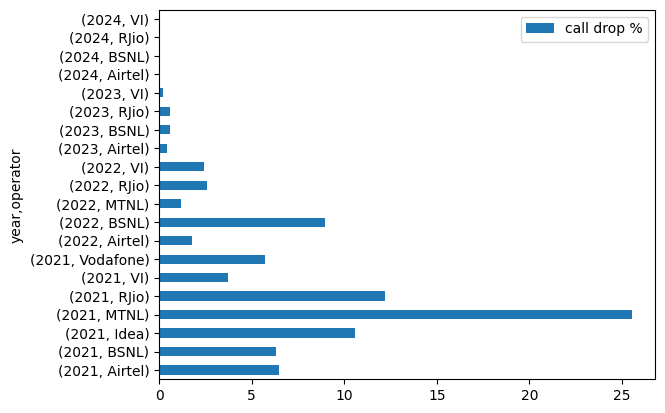

In [31]:
call_drop_df_yearly.plot(kind="barh");

In [32]:
call_drop_df_yearly_reset

NameError: name 'call_drop_df_yearly_reset' is not defined

In [33]:
call_drop_df_yearly_reset = call_drop_df_yearly.reset_index()

# Plotting with Plotly Express
fig = px.bar(
    data_frame=call_drop_df_yearly_reset,
    x='operator',  # Use the correct column name for the x-axis
    y='call drop %',  # Use the correct column name for the y-axis
    color='year',  # Use the correct column name for coloring
    title="Call Drop Percentage per Operator",
    barmode="overlay"
    )
fig.update_coloraxes(showscale=False)
fig.update_xaxes(tickmode = 'array',
                 tickvals = call_drop_df_yearly_reset['operator'])
fig.show()
fig.write_html("Call drop % across years for each operator")

In [34]:
(raw_df_1['latitude'].value_counts(), raw_df_1['longitude'].value_counts())

(latitude
 -1.000000     45709
  31.611766      194
  31.612153       67
  18.484905       55
  31.611560       55
               ...  
  12.941474        1
  21.123077        1
  25.605013        1
  19.220606        1
  30.104811        1
 Name: count, Length: 27835, dtype: int64,
 longitude
 -1.000000     45709
  76.921271      206
  76.921632      108
  76.921992       93
  73.857559       55
               ...  
  79.067894        1
  77.489627        1
  77.489655        1
  77.492747        1
  79.067979        1
 Name: count, Length: 27636, dtype: int64)

In [35]:
raw_df_1['state_name'].value_counts()

state_name
Maharashtra          14065
Karnataka             6369
Madhya Pradesh        5017
Uttar Pradesh         3378
West Bengal           3027
Delhi                 2549
Kerala                2340
Uttarakhand           2238
Himachal Pradesh      2073
Chhattisgarh          2019
Gujarat               1983
Rajasthan             1569
Telangana             1294
Andhra Pradesh        1188
Tamil Nadu            1186
Nagaland               928
Jharkhand              810
Bihar                  682
Haryana                601
Punjab                 565
Assam                  205
Odisha                  64
Goa                     28
Jammu and Kashmir       20
Manipur                  8
Meghalaya                7
Kashmir                  6
Puducherry               3
Laccadives               3
Tripura                  3
Arunachal Pradesh        2
Chandigarh               2
NCT                      2
Mizoram                  1
Name: count, dtype: int64

In [36]:
raw_df_1['operator'].value_counts()

operator
RJio        36899
Airtel      22926
VI          17889
BSNL         8058
Idea         7508
Vodafone     6343
MTNL          337
Name: count, dtype: int64

## Narrowing our analysis to only three operatros RJIo, Airtel and Vi as remaining operators do not even have 10000 points overall three years combined

In [37]:
raw_df_1[raw_df_1['operator'].isin(["RJio" ,"Airtel", "VI"])].isna().sum()

inout_travelling         0
operator                 0
network_type            18
rating                   0
calldrop_category        0
latitude                 0
longitude                0
state_name           33453
month                    0
year                     0
dtype: int64

## Dropping rows where there is an invalid latitude and longtide

In [38]:
raw_df_1 = raw_df_1[raw_df_1['latitude']!=-1]
raw_df_1.reset_index(drop=True)

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
1,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022
3,Indoor,RJio,4G,3,Satisfactory,19.225397,72.859307,Maharashtra,7,2022
4,Outdoor,VI,4G,4,Satisfactory,25.525933,87.032880,Bihar,7,2022
...,...,...,...,...,...,...,...,...,...,...
54246,Indoor,RJio,4G,5,Satisfactory,12.956510,77.489557,Karnataka,11,2023
54247,Outdoor,VI,4G,1,Poor Voice Quality,21.132335,79.068327,Maharashtra,11,2023
54248,Indoor,RJio,4G,5,Satisfactory,12.958151,77.484752,Karnataka,11,2023
54249,Indoor,Airtel,4G,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023


- checking na value percentage for state_name operator wise

In [39]:
for operator in raw_df_1['operator'].unique():
    print(f"state_name as na in {operator}:",(raw_df_1[raw_df_1['operator'].isin([operator])]['state_name'].isna().sum()/len(raw_df_1[raw_df_1['operator'].isin([operator])]['state_name']))*100,"%")

state_name as na in RJio: 0.07853531635007117 %
state_name as na in VI: 0.0 %
state_name as na in Airtel: 0.0 %
state_name as na in BSNL: 0.0 %
state_name as na in MTNL: 0.0 %
state_name as na in Vodafone: 0.0 %
state_name as na in Idea: 0.0 %


- dropping the rows where state name as NA and dropping na values as well

In [40]:
raw_df_1 = raw_df_1[raw_df_1['state_name']!="NA "]
raw_df_1.dropna(inplace=True)
raw_df_1.reset_index(inplace=True, drop=True)

- checking for na values

In [41]:
raw_df_1.isna().sum()

inout_travelling     0
operator             0
network_type         0
rating               0
calldrop_category    0
latitude             0
longitude            0
state_name           0
month                0
year                 0
dtype: int64

- printing counts of each operator

In [42]:
for operator in raw_df_1['operator'].unique():
    print(f"for {operator} the total rows are {raw_df_1[raw_df_1['operator']==operator]['operator'].count()}")

for RJio the total rows are 20357
for VI the total rows are 10778
for Airtel the total rows are 13126
for BSNL the total rows are 3092
for MTNL the total rows are 278
for Vodafone the total rows are 2937
for Idea the total rows are 3667


- narrowing our analysis to RJio, VI and Airtel as they have atleast 10,000 rows for each. Also, Idea and Vodafone combined and formed VI in 2021

In [43]:
# creating individual dataframes for each operator
RJio= raw_df_1[raw_df_1['operator']=='RJio'].reset_index(drop=True)
VI= raw_df_1[raw_df_1['operator']=='VI'].reset_index(drop=True)
Airtel= raw_df_1[raw_df_1['operator']=='Airtel'].reset_index(drop=True)

- for each operator let us concentrate on the geographic dimension and also time dimension

- let us look at the data distribution for each state in each operator

In [44]:
for state in RJio['state_name'].unique():
    print(f"for RJio {state} the no of rows are {RJio[RJio['state_name']==state]['state_name'].count()}")

for RJio Uttar Pradesh the no of rows are 1536
for RJio Maharashtra the no of rows are 6401
for RJio Karnataka the no of rows are 1547
for RJio Telangana the no of rows are 302
for RJio Delhi the no of rows are 1264
for RJio Odisha the no of rows are 21
for RJio Uttarakhand the no of rows are 1015
for RJio Madhya Pradesh the no of rows are 693
for RJio Haryana the no of rows are 168
for RJio Chhattisgarh the no of rows are 944
for RJio Rajasthan the no of rows are 1086
for RJio Jharkhand the no of rows are 64
for RJio West Bengal the no of rows are 998
for RJio Kerala the no of rows are 190
for RJio Tamil Nadu the no of rows are 137
for RJio Bihar the no of rows are 211
for RJio Gujarat the no of rows are 423
for RJio Andhra Pradesh the no of rows are 368
for RJio Himachal Pradesh the no of rows are 2052
for RJio Nagaland the no of rows are 882
for RJio Punjab the no of rows are 22
for RJio Assam the no of rows are 7
for RJio Jammu and Kashmir the no of rows are 10
for RJio Goa the no 

In [ ]:
RJio['state_name'].value_counts()

state_name
Maharashtra          6401
Himachal Pradesh     2052
Karnataka            1547
Uttar Pradesh        1536
Delhi                1264
Rajasthan            1086
Uttarakhand          1015
West Bengal           998
Chhattisgarh          944
Nagaland              882
Madhya Pradesh        693
Gujarat               423
Andhra Pradesh        368
Telangana             302
Bihar                 211
Kerala                190
Haryana               168
Tamil Nadu            137
Jharkhand              64
Punjab                 22
Odisha                 21
Jammu and Kashmir      10
Goa                     9
Assam                   7
Tripura                 2
Arunachal Pradesh       2
Kashmir                 1
Chandigarh              1
NCT                     1
Name: count, dtype: int64

- narrowing our analysis to those states which have atleast a 1000 data points

In [ ]:
state_names_jio = ['Maharashtra', 'Himachal Pradesh', 'Karnataka', 'Uttar Pradesh','Delhi', 'Rajasthan', 'Uttarakhand', "West Bengal", 'Chhattisgarh', 'Nagaland', 'Madhya Pradesh']
for state in state_names_jio:
    print(RJio[RJio['state_name']==state]['state_name'].value_counts())

state_name
Maharashtra    6401
Name: count, dtype: int64
state_name
Himachal Pradesh    2052
Name: count, dtype: int64
state_name
Karnataka    1547
Name: count, dtype: int64
state_name
Uttar Pradesh    1536
Name: count, dtype: int64
state_name
Delhi    1264
Name: count, dtype: int64
state_name
Rajasthan    1086
Name: count, dtype: int64
state_name
Uttarakhand    1015
Name: count, dtype: int64
state_name
West Bengal    998
Name: count, dtype: int64
state_name
Chhattisgarh    944
Name: count, dtype: int64
state_name
Nagaland    882
Name: count, dtype: int64
state_name
Madhya Pradesh    693
Name: count, dtype: int64


In [ ]:
RJio.dtypes

inout_travelling      object
operator              object
network_type          object
rating                 int64
calldrop_category     object
latitude             float64
longitude            float64
state_name            object
month                  int64
year                   int64
dtype: object

In [45]:
# Group by year, month and calldrop category and calculate counts
df = RJio.groupby(['year','month'])[['calldrop_category']].value_counts()

# Calculate percentages within each group
df = df.unstack()  # Unstack for calculating percentages

df = df.div(df.sum(axis=1), axis=0) * 100  # Calculate percentages
px.line(df.reset_index(),
        color="year",
        y="Call Dropped",
        x='month',
        title=" Call drop % across years for each month for RJio"
        )

In [46]:
# Group by year, month and calldrop category and calculate counts
df = RJio.groupby(['year','month'])[['calldrop_category']].value_counts()

# Calculate percentages within each group
df = df.unstack()  # Unstack for calculating percentages

df = df.div(df.sum(axis=1), axis=0) * 100  # Calculate percentages
fig =px.line(df.reset_index(),
        color="year",
        y="Call Dropped",
        x='month',
        title=" RJio Call drop % across the years for each month"
        )
fig.write_html("RJio Call drop % across the years for each month")

In [72]:
df = RJio.groupby(['state_name','year'])['rating'].mean()
df = df.reset_index()
df

,state_name,year,rating
0,Andhra Pradesh,2021,2.938547
1,Andhra Pradesh,2022,1.500000
2,Andhra Pradesh,2023,1.500000
3,Arunachal Pradesh,2021,1.000000
4,Arunachal Pradesh,2022,5.000000
...,...,...,...
74,Uttarakhand,2024,2.619718
75,West Bengal,2021,3.988655
76,West Bengal,2022,4.581921
77,West Bengal,2023,2.944444


In [81]:
df = RJio.groupby(['state_name','year'])['rating'].mean()
df = df.reset_index()
for state in df['state_name'].unique():
        fig=px.line(data_frame=df[df['state_name']==state],
                color="state_name",
                y='rating',
                x='year',
                title=f" Average rating across years for each month for RJio for {state}"
                )
        fig.show()

In [ ]:
RJio.groupby(['year','month'])[['rating']].mean().reset_index()

,year,month,rating
0,2021,1,3.812427
1,2021,2,3.912654
2,2021,3,4.204871
3,2021,4,3.254772
4,2021,5,2.961334
5,2021,6,2.867769
6,2021,7,2.721187
7,2021,8,2.474757
8,2021,9,2.340761
9,2021,10,2.128448


In [ ]:
RJio[(RJio['state_name']=="Himachal Pradesh")]['calldrop_category'].value_counts()

calldrop_category
Call Dropped          1881
Poor Voice Quality     139
Satisfactory            32
Name: count, dtype: int64

In [ ]:
# Group by year, month and calldrop category and calculate counts

# Calculate percentages within each group

for state in state_names_jio:
        df= RJio[RJio['state_name']==state].reset_index()
        df = df.groupby(['year','month'])['calldrop_category'].value_counts().unstack()
        df =df.div(df.sum(axis=1),0)*100
        fig= px.line(df.reset_index(),
                color='year',
                y="Call Dropped",
                x='month',
                title=f" Call drop % across {state} for each month for RJio"
                )
        fig.show()

In [ ]:
df

calldrop_category  Call Dropped  Poor Voice Quality  Satisfactory
year month                                                       
2021 1                 8.733880           14.830012     76.436108
     2                 4.031355           12.206047     83.762598
     3                 3.533906            9.264565     87.201528
     4                20.851689           16.519824     62.628488
     5                33.737680            4.018196     62.244124
     6                22.038567           13.567493     64.393939
     7                25.327812           21.601104     53.071084
     8                37.669903           17.864078     44.466019
     9                30.269266           30.547818     39.182916
     10               24.224138           41.982759     33.793103
     11               22.934473           50.997151     26.068376
     12               30.555556           23.202614     46.241830
2022 1                18.453865           10.473815     71.072319
     2                13.698630           12.328767     73.972603
     3                 6.521739           18.322981     75.155280
     4                 6.521739           18.322981     75.155280
     5                19.696970           19.696970     60.606061
     6                14.619883           15.204678     70.175439
     7                11.041009           14.826498     74.132492
     8                 5.161290           27.096774     67.741935
     9                14.838710           20.000000     65.161290
     10                5.675676           18.648649     75.675676
     11                2.702703           12.612613     84.684685
     12                4.587156           23.853211     71.559633
2023 1                 6.122449           16.326531     77.551020
     2                 2.521008            5.462185     92.016807
     3                 3.149606            8.661417     88.188976
     4                 2.068966           16.551724     81.379310
     5                 3.921569           47.385621     48.692810
     6                11.371237           38.461538     50.167224
     7                 4.621849           32.352941     63.025210
     8                 2.500000           26.875000     70.625000
     9                 4.046243           36.994220     58.959538
     10                     NaN           42.857143     57.142857
     11                1.219512            1.219512     97.560976
     12                2.666667           30.666667     66.666667
2024 1                 2.739726           66.666667     30.593607
     2                 2.339181           27.485380     70.175439

In [ ]:
(RJio[RJio['calldrop_category']=="Call Dropped"]['operator'].count()/RJio['calldrop_category'].count())*100

np.float64(16.908188829395293)

In [ ]:
# Plotting with Plotly Express
fig = px.bar(
    data_frame=call_drop_df_yearly_reset,
    x='operator',  # Use the correct column name for the x-axis
    y='call drop %',  # Use the correct column name for the y-axis
    color='year',  # Use the correct column name for coloring
    title="Call Drop Percentage per Operator",
    barmode="overlay"
    )
fig.update_coloraxes(showscale=False)
fig.update_xaxes(tickmode = 'array',
                 tickvals = call_drop_df_yearly_reset['operator'])
fig.show()

In [ ]:
categorical_columns = raw_df.select_dtypes(include="object")
numerical_columns = raw_df.select_dtypes(exclude="object")

In [ ]:
for i in categorical_columns:
    print(raw_df[i].value_counts())

inout_travelling
Indoor        41086
Outdoor       13249
Travelling     4274
Name: count, dtype: int64
operator
RJio        21795
Airtel      13831
VI          12446
Idea         3667
BSNL         3652
Vodafone     2937
MTNL          281
Name: count, dtype: int64
network_type
4G         44390
Unknown     9587
3G          2455
2G          2177
Name: count, dtype: int64
calldrop_category
Satisfactory          42636
Poor Voice Quality     9689
Call Dropped           6284
Name: count, dtype: int64
state_name
Maharashtra          14065
Karnataka             6369
Madhya Pradesh        5017
NA                    4374
Uttar Pradesh         3378
West Bengal           3027
Delhi                 2549
Kerala                2340
Uttarakhand           2238
Himachal Pradesh      2073
Chhattisgarh          2019
Gujarat               1983
Rajasthan             1569
Telangana             1294
Andhra Pradesh        1188
Tamil Nadu            1186
Nagaland               928
Jharkhand              810
Biha

# network type column has too many _unknown_ category classes
# state also have _NA_ as invalid values in _state_name_ column

In [ ]:
raw_df.columns

Index(['inout_travelling', 'operator', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')

In [ ]:
for i in ["month", "year","rating"]:
    print(raw_df[i].value_counts())

month
1     10829
3      5835
4      5139
10     4864
12     4567
2      4395
5      4151
7      4091
6      4053
11     3982
8      3570
9      3133
Name: count, dtype: int64
year
2021    41338
2022    12896
2023     3831
2024      544
Name: count, dtype: int64
rating
5    24663
4    14169
1    12239
3     5089
2     2449
Name: count, dtype: int64


- no invalid values in month, year and rating columns
- there are invalid values in longitude and latitude columns with a value _-1_

- _Business measures_ are average network rating, average call quality
- _Business dimensions_ are month, year, location and network type

- What are overall `call ratings` by time? _Monthly, quarterly, and yearly level_
- What are overall `call ratings` by _state_?
- What are overall `call ratings` by _netork_type_? What about by _operator_?
- What months have the highest or lowest `call ratings`? Is there a pattern in terms of which seasons perform the best?
- Which _operator_ have the highest or lowest `call ratings`?
- What was the `call ratings` month-over-month? Does this rate differ across _states_?

In [ ]:

# Group by 'state' and calculate the mean rating
state_grouped_df = raw_df.groupby(by=['state_name'])['rating'].mean().reset_index()

# Create the line plot using Plotly
fig = px.bar(state_grouped_df, x='state_name', y='rating', title='Average Rating by state')

# Show the plot
fig.show()

- As we can see due to the low number of points in certain states, the ratings are showing very high for NCT, Mizoram, Chandigarh, Goa, Odisha etc
- let us set a threshold of 1000 points atleast from each state and do categorical sampling i.e., consider only those states which have atleast 1000 data points and sample 1000 points from each state

"""- Define the categories you want to sample"""
categories_to_sample = ['A', 'B']

"""- Filter the DataFrame to include only the desired categories"""
filtered_df = df[df['category'].isin(categories_to_sample)]

""" Sample the DataFrame (e.g., sample 2 elements from each category)"""
sampled_df = filtered_df.groupby('category').sample(n=2, random_state=42)

print(sampled_df)


In [ ]:

# Group by 'month' and calculate the mean rating
op_grouped_df = raw_df.groupby(by=['operator'])['rating'].mean().reset_index()

# Create the line plot using Plotly
fig = px.line(op_grouped_df, x='operator', y='rating', title='Average Rating by operator', )

# Show the plot
fig.show()

- What are the monthly or yearly `ratings` for 4G & 3G calls? 
- What is the `average rating` value for 4G  vs. 3G calls?
- Does one group have a better `“trend”` than the other group (i.e. [lower `ratings`, but getting better recently] vs. [higher `ratings`, but getting worse recently])

In [ ]:

# Group by 'month' and calculate the mean rating
grouped_df_4g = raw_df.groupby(by=['network_type'])['rating'].mean().reset_index()

# Create the line plot using Plotly
fig = px.line(grouped_df_4g, x='network_type', y='rating', title='Average Rating by network type', )

# Show the plot
fig.show()

- 3G network sems to have higher ratings than 4G but it also needs a count check

In [ ]:
raw_df['network_type'].value_counts()

network_type
4G         44390
Unknown     9587
3G          2455
2G          2177
Name: count, dtype: int64

- 3G data points are <10% of the 4G data points hence let us randomly sample 3500 data points from each network type and then compare the ratings

In [ ]:
raw_df.columns

Index(['inout_travelling', 'operator', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')

-_Service Performance:_

    What is the average rating of different operators?
    How does network type (3G, 4G, etc.) affect call drop rates?
    Which states or regions experience the highest call drop rates?

-_Customer Experience:_

    How does customer rating vary by operator and network type?
    Are there specific months or times of the year when call drop rates are higher?
    What is the distribution of call drop categories (like signal issues, network congestion) across different operators?

-_Geographical Insights:_

    How does call quality vary across different states or regions (using latitude and longitude)?
    Are there geographical patterns in customer ratings or call drop categories?

-_Temporal Trends:_

    How has call quality (rating) changed over the years?
    Are there seasonal trends in call drop rates or customer satisfaction ratings?
    Has there been any improvement or deterioration in service performance over time?

-_Operational Efficiency:_

    Is there a correlation between operator performance and the type of network (3G, 4G, etc.) used?
    How do different operators compare in terms of resolving call drop issues quickly (calldrop_category)?
    Are there specific months when operators perform better or worse in terms of call quality?

-_Predictive Analysis:_

    Can we predict potential call drop incidents based on historical data and other factors (like network type, location)?

# Service Performance

##  by Ratings

In [ ]:
for i in categorical_columns:
    grouped_df = raw_df.groupby(by=i)['rating'].mean().reset_index()
    fig = px.line(grouped_df, x=i, y='rating', title= 'Average Rating by '+ i, )

    # Show the plot
    fig.show()
    

## by call drop category

In [ ]:
categorical_columns.columns

Index(['inout_travelling', 'operator', 'network_type', 'calldrop_category',
       'state_name'],
      dtype='object')

In [ ]:
categorical_column =['inout_travelling', 'operator', 'network_type',
       'state_name']

In [ ]:
for i in categorical_column:
    grouped_df = raw_df.groupby(by=i)['calldrop_category'].agg(lambda x: x.mode().iloc[0]).reset_index()
    fig = px.line(grouped_df, x=i, y='calldrop_category', title= 'Most call drop category by '+ i, )

    # Show the plot
    fig.show()
    

# Customer Experience

## by rating

In [ ]:
# Group by 'operator' and 'network_type' and calculate mean rating
grouped_df = raw_df.groupby(['operator', 'network_type'])['rating'].mean().reset_index()

# Plot using Plotly Express
fig = px.line(grouped_df, x='operator', y='rating', title='Average customer rating conditioned by operator and network type', color='network_type')

# Show the plot
fig.show()

In [ ]:
categorical_columns.columns

Index(['inout_travelling', 'operator', 'network_type', 'calldrop_category',
       'state_name'],
      dtype='object')

In [ ]:
numerical_columns.columns

Index(['rating', 'latitude', 'longitude', 'month', 'year'], dtype='object')

In [ ]:
raw_df[raw_df['operator'] == "RJio"]['network_type'].value_counts()

network_type
4G         20170
Unknown     1598
3G            24
2G             3
Name: count, dtype: int64

## there must have been some error, as per the records RJio never had the infrastructure for 2G & 3G networks hence, we need to remove those

In [ ]:
RJio_4G = raw_df[(raw_df['operator'] == "RJio") & (raw_df['network_type'] == "4G")]
airtel_4G = raw_df[(raw_df['operator'] == "Airtel") & (raw_df['network_type'] == "4G")]

In [ ]:
RJio_4G[(RJio_4G['latitude']==-1) | (RJio_4G['longitude']==-1)]

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
962,Outdoor,RJio,4G,4,Satisfactory,-1.0,-1.0,NA,1,2022
968,Indoor,RJio,4G,1,Poor Voice Quality,-1.0,-1.0,NA,1,2022
969,Indoor,RJio,4G,5,Satisfactory,-1.0,-1.0,NA,1,2022
973,Indoor,RJio,4G,5,Satisfactory,-1.0,-1.0,NA,1,2022
981,Indoor,RJio,4G,4,Satisfactory,-1.0,-1.0,NA,1,2022
...,...,...,...,...,...,...,...,...,...,...
57833,Outdoor,RJio,4G,3,Satisfactory,-1.0,-1.0,NA,1,2022
57835,Indoor,RJio,4G,3,Satisfactory,-1.0,-1.0,NA,1,2022
57839,Outdoor,RJio,4G,4,Satisfactory,-1.0,-1.0,NA,1,2022
57840,Indoor,RJio,4G,5,Satisfactory,-1.0,-1.0,NA,1,2022


In [ ]:

grouped_df = RJio_4G.groupby(['month','year'])['rating'].mean().reset_index()
fig = px.line(data_frame=grouped_df, x='month', y='rating', color='year', title= " average customer rating for RJio 4G across months and years")
fig.show()

In [ ]:
grouped_df = RJio_4G.groupby(['month','year'])['rating'].mean().reset_index()
grouped_df.sort_values(by=['year','month'],ascending=True, inplace=True)

In [ ]:
RJio_4G['calldrop_category'].value_counts()

calldrop_category
Satisfactory          12320
Poor Voice Quality     4192
Call Dropped           3658
Name: count, dtype: int64

In [ ]:
fig = px.pie(RJio_4G, 
             names=RJio_4G['calldrop_category'].value_counts().index, 
             values=RJio_4G['calldrop_category'].value_counts().values, 
             title='Call quality distribution across RJio 4G')
fig.show()

In [ ]:
fig = px.pie(RJio_4G, 
             names=RJio_4G['rating'].value_counts().index, 
             values=RJio_4G['rating'].value_counts().values, 
             title='Rating distribution across RJio 4G')
fig.show()

In [ ]:
call_drops = RJio_4G[RJio_4G['calldrop_category'] == "Call Dropped"].groupby('state_name')['calldrop_category'].count().reset_index()
call_complete = RJio_4G[RJio_4G['calldrop_category'] == "Satisfactory"].groupby('state_name')['calldrop_category'].count().reset_index()
call_complete.sort_values(by="calldrop_category",ascending=False, inplace=True)
call_drops.sort_values(by="calldrop_category",ascending=False, inplace=True)
# px.line(call_drops, x="state_name", y='calldrop_category')

In [ ]:
pd.merge(left=call_drops, right=call_complete, on="state_name", how="inner", suffixes=['_drop', '_complete'])

,state_name,calldrop_category_drop,calldrop_category_complete
0,Himachal Pradesh,1872,32
1,Nagaland,623,46
2,NA,300,744
3,Maharashtra,256,4838
4,Uttar Pradesh,108,956
5,Karnataka,105,1324
6,Delhi,95,273
7,Rajasthan,58,684
8,West Bengal,46,540
9,Bihar,46,77


In [ ]:
crosstab = pd.crosstab(index=RJio_4G['state_name'], columns=RJio_4G['calldrop_category'])
plt.figure(figsize=(20,8))
px.area(data_frame=crosstab)

<Figure size 2000x800 with 0 Axes>

In [ ]:
RJio_4G[RJio_4G['calldrop_category']=='Call Dropped']

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
14,Indoor,RJio,4G,1,Call Dropped,26.615490,83.778166,Uttar Pradesh,7,2022
32,Indoor,RJio,4G,1,Call Dropped,15.871390,74.505630,Karnataka,7,2022
56,Indoor,RJio,4G,1,Call Dropped,17.326592,78.515735,Telangana,7,2022
139,Indoor,RJio,4G,1,Call Dropped,15.867172,74.511250,Karnataka,7,2022
156,Indoor,RJio,4G,1,Call Dropped,30.076513,78.249547,Uttarakhand,7,2022
...,...,...,...,...,...,...,...,...,...,...
58256,Outdoor,RJio,4G,1,Call Dropped,30.110007,78.295288,Uttarakhand,6,2023
58277,Indoor,RJio,4G,2,Call Dropped,25.732440,85.809298,Bihar,9,2023
58411,Indoor,RJio,4G,1,Call Dropped,19.220604,72.842107,Maharashtra,5,2023
58456,Indoor,RJio,4G,1,Call Dropped,12.956550,77.489699,Karnataka,4,2023


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming RJio_4G is a DataFrame with 'rating' and 'state_name' columns

# Calculate total ratings per state
total_ratings_per_state = RJio_4G.groupby('state_name')['rating'].count()

# Calculate percentage distribution for each state
rating_distribution_by_state = (
    RJio_4G.groupby('state_name')['rating'].value_counts().unstack(fill_value=0)
    .div(total_ratings_per_state, axis=0)  # Divide by total ratings per state (row-wise)
    .mul(100)  # Multiply by 100 to convert to percentage
)

# Use 'count' (or the actual column name) from rating_distribution_by_state as y-axis
fig = px.bar(rating_distribution_by_state, x=rating_distribution_by_state.index,  # x-axis: rating values
             y=rating_distribution_by_state.columns,  # y-axis: state names
             title='Percentage Distribution of Ratings Across States in RJio 4G',
             # Customize y-axis labels to show percentages
             labels={'y': 'Percentage of Ratings (%)'}
             )
fig.show()


In [ ]:
RJio_4G.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20170 entries, 0 to 58606
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inout_travelling   20170 non-null  object 
 1   operator           20170 non-null  object 
 2   network_type       20170 non-null  object 
 3   rating             20170 non-null  int64  
 4   calldrop_category  20170 non-null  object 
 5   latitude           20170 non-null  float64
 6   longitude          20170 non-null  float64
 7   state_name         20170 non-null  object 
 8   month              20170 non-null  int64  
 9   year               20170 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [ ]:
print(RJio_4G.groupby(['year'])['rating'].mean()) # yealy mean customer ratings
print(RJio_4G.groupby(['year'])['rating'].mean().pct_change()*100) # yealy mean customer ratings growth rate


year
2021    3.028162
2022    3.407522
2023    3.196674
2024    2.645333
Name: rating, dtype: float64
year
2021          NaN
2022    12.527704
2023    -6.187702
2024   -17.247330
Name: rating, dtype: float64


In [ ]:
fig = px.pie(airtel_4G, 
             names=airtel_4G['calldrop_category'].value_counts().index, 
             values=airtel_4G['calldrop_category'].value_counts().values, 
             title='Call quality distribution across airtel 4G')
fig.show()

In [ ]:
airtel_4G.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8601 entries, 7 to 58607
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inout_travelling   8601 non-null   object 
 1   operator           8601 non-null   object 
 2   network_type       8601 non-null   object 
 3   rating             8601 non-null   int64  
 4   calldrop_category  8601 non-null   object 
 5   latitude           8601 non-null   float64
 6   longitude          8601 non-null   float64
 7   state_name         8601 non-null   object 
 8   month              8601 non-null   int64  
 9   year               8601 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 739.1+ KB


In [ ]:
fig = px.pie(airtel_4G, 
             names=airtel_4G['rating'].value_counts().index, 
             values=airtel_4G['rating'].value_counts().values, 
             title='rating distribution across airtel 4G')
fig.show()

In [ ]:
import plotly.express as px

# Assuming airtel_4G is a DataFrame with 'rating' and 'state_name' columns

# Calculate total ratings per state
total_ratings_per_state = airtel_4G.groupby('state_name')['rating'].count()

# Calculate percentage distribution for each state
rating_distribution_by_state = (
    airtel_4G.groupby('state_name')['rating'].value_counts().unstack(fill_value=0)
    .div(total_ratings_per_state, axis=0)  # Divide by total ratings per state (row-wise)
    .mul(100)  # Multiply by 100 to convert to percentage
)

# Use 'count' (or the actual column name) from rating_distribution_by_state as y-axis
fig = px.bar(rating_distribution_by_state, x=rating_distribution_by_state.index,  # x-axis: rating values
             y=rating_distribution_by_state.columns,  # y-axis: state names
             title='Percentage Distribution of Ratings Across States in Airtel 4G',
             # Customize y-axis labels to show percentages
             labels={'y': 'Percentage of Ratings (%)'}
             )
fig.show()


In [ ]:
grouped_df['avg_ratings_growth_rate']=grouped_df['rating'].pct_change()*100

In [ ]:
grouped_df

,month,year,rating,avg_ratings_growth_rate
0,1,2021,3.824862,NaN
4,2,2021,3.922897,2.563098
8,3,2021,4.221443,7.610337
11,4,2021,3.232614,-23.423957
14,5,2021,2.902419,-10.214475
17,6,2021,2.719906,-6.288332
20,7,2021,2.572531,-5.418376
23,8,2021,2.412666,-6.214304
26,9,2021,2.321705,-3.770126
29,10,2021,2.028311,-12.637043


<Axes: xlabel='month'>

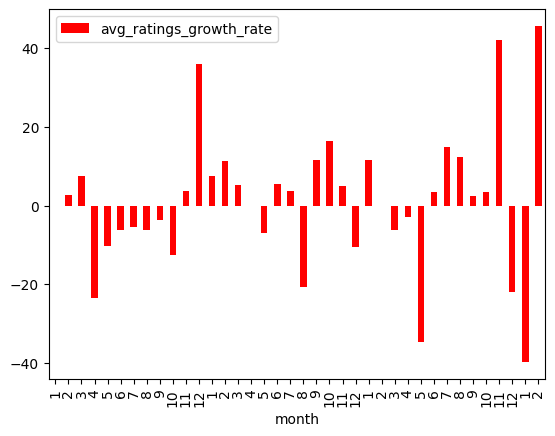

In [ ]:
grouped_df.plot(kind='bar', x='month', y='avg_ratings_growth_rate', color='r' )

In [ ]:

grouped_df = airtel_4G.groupby(['month','year'])['rating'].mean().reset_index()
fig = px.line(data_frame=grouped_df, x='month', y='rating', color='year', title= " average customer rating for airtel 4G across months and years")
fig.show()